**Mini Project Pelatihan 1 (Day 1–4)**

**Analisis dan Klasifikasi Risiko Sosial Ekonomi Desa Menggunakan Decision Tree**

**1. Eksplorasi dan Pembersihan Data**

**Menyiapkan Dataset**

In [20]:
## Import library
import geopandas as gpd

In [21]:
## load data dari gdriver processed_jkt.shp
data = gpd.read_file('/content/drive/MyDrive/training_ml_geospasial_geosoftware/MiniProject1/Processed JKT/processed_jkt.shp')

**Mengeksplorasi Data**

In [127]:
#data.DESA.unique()

In [128]:
data.KECAMATAN.unique()

In [129]:
data

**Menangani missing values dan tipe data**

In [130]:
## rename resiko_k_1 menjadi resiko_sosek
data = data.rename(columns={'resiko_k_1': 'resiko_sosek'})
data

In [27]:
## review data untuk mengetahui missing values dan melihat tipe data
data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 49 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   OBJECT_ID     267 non-null    float64 
 1   KODE_DESA     267 non-null    object  
 2   DESA          267 non-null    object  
 3   KODE          267 non-null    float64 
 4   PROVINSI      267 non-null    object  
 5   KAB_KOTA      267 non-null    object  
 6   KECAMATAN     267 non-null    object  
 7   DESA_KELUR    267 non-null    object  
 8   JUMLAH_PEN    267 non-null    float64 
 9   JUMLAH_KK     267 non-null    float64 
 10  LUAS_WILAY    267 non-null    float64 
 11  KEPADATAN     267 non-null    float64 
 12  PERPINDAHA    267 non-null    float64 
 13  PERUBAHAN     267 non-null    float64 
 14  WAJIB_KTP     267 non-null    float64 
 15  ISLAM         267 non-null    float64 
 16  KRISTEN       267 non-null    float64 
 17  KHATOLIK      267 non-null    float64 
 18  HI

In [28]:
#mengetahui ukuran data
data.shape

(267, 49)

In [29]:
#menghitung total data kosong
data.isna().sum()

,0
OBJECT_ID,0
KODE_DESA,0
DESA,0
KODE,0
PROVINSI,0
KAB_KOTA,0
KECAMATAN,0
DESA_KELUR,0
JUMLAH_PEN,0
JUMLAH_KK,0


In [30]:
## pemeriksaan sistem koordinat
data.crs

<Projected CRS: EPSG:32748>
Name: WGS 84 / UTM zone 48S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 102°E and 108°E, southern hemisphere between 80°S and equator, onshore and offshore. Indonesia.
- bounds: (102.0, -80.0, 108.0, 0.0)
Coordinate Operation:
- name: UTM zone 48S
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [31]:
## mengubah sistem crs
data = data.to_crs(epsg=32748)

In [32]:
data.crs

<Projected CRS: EPSG:32748>
Name: WGS 84 / UTM zone 48S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 102°E and 108°E, southern hemisphere between 80°S and equator, onshore and offshore. Indonesia.
- bounds: (102.0, -80.0, 108.0, 0.0)
Coordinate Operation:
- name: UTM zone 48S
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [221]:
# Filter baris dengan resiko_sosek == 0
data_nol = data[data['resiko_sosek'] == 0]

# Tampilkan daftar unik kecamatan yang punya nilai tersebut
kecamatan_nol = data_nol['KECAMATAN'].unique()

# Cetak hasil
print("Kecamatan dengan nilai resiko_sosek == 0:")
for kec in kecamatan_nol:
    print("-", kec)


Kecamatan dengan nilai resiko_sosek == 0:
- TAMAN SARI
- KEPULAUAN SERIBU UTARA
- SAWAH BESAR
- KEPULAUAN SERIBU SELATAN.
- GAMBIR
- SENEN
- CEMPAKA PUTIH
- MENTENG
- PENJARINGAN
- KELAPA GADING
- GROGOL PETAMBURAN
- KEBON JERUK
- SETIABUDI
- MAMPANG PRAPATAN
- KEBAYORAN BARU
- CILANDAK
- PANCORAN
- JAGAKARSA
- KEMAYORAN
- TANAH ABANG
- TAMBORA
- PAL MERAH
- TEBET
- KEMBANGAN
- JATINEGARA
- CIPAYUNG


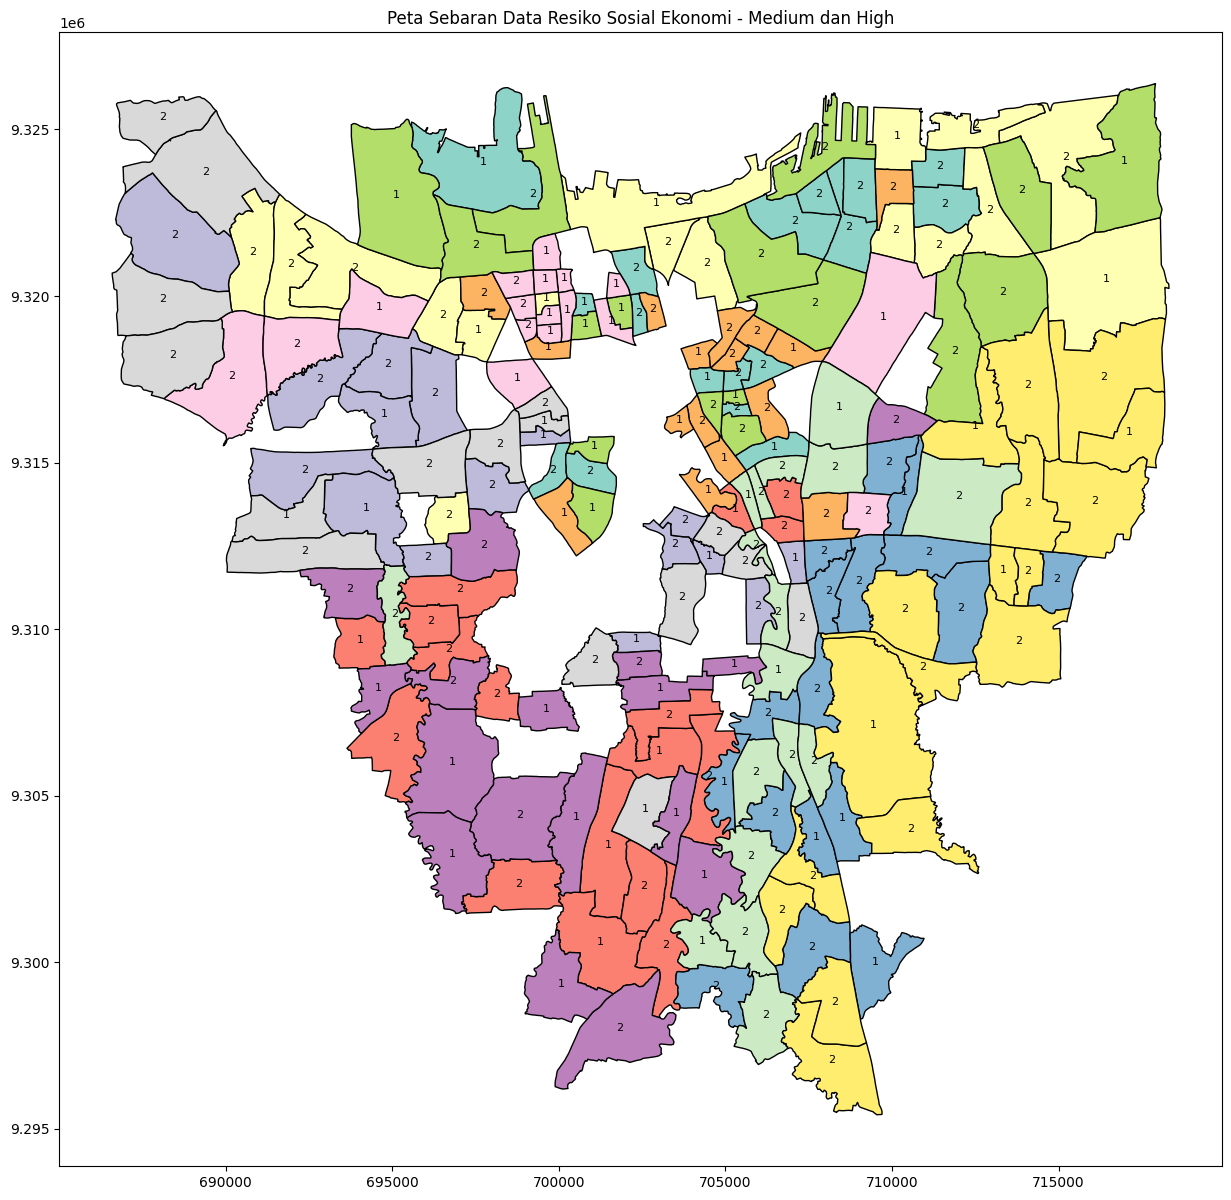

In [148]:
# Filter data resiko_sosek tidak sama dengan low
data_resiko_sosek_low = data[data['resiko_sosek'] != 0]

import matplotlib.pyplot as plt

# Plot selain resiko_sosek tidak sama dengan low
data_resiko_sosek_low.plot(
    figsize=(15, 30),
    edgecolor="black",
    cmap='Set3'
)

plt.title('Peta Sebaran Data Resiko Sosial Ekonomi - Medium dan High')

# Tambahkan label (opsional)
for index, row in data_resiko_sosek_low.iterrows():
    x = row['geometry'].centroid.x
    y = row['geometry'].centroid.y
    plt.text(x, y, row['resiko_sosek'], fontsize=8, ha='center')

plt.axis('on')
plt.show()


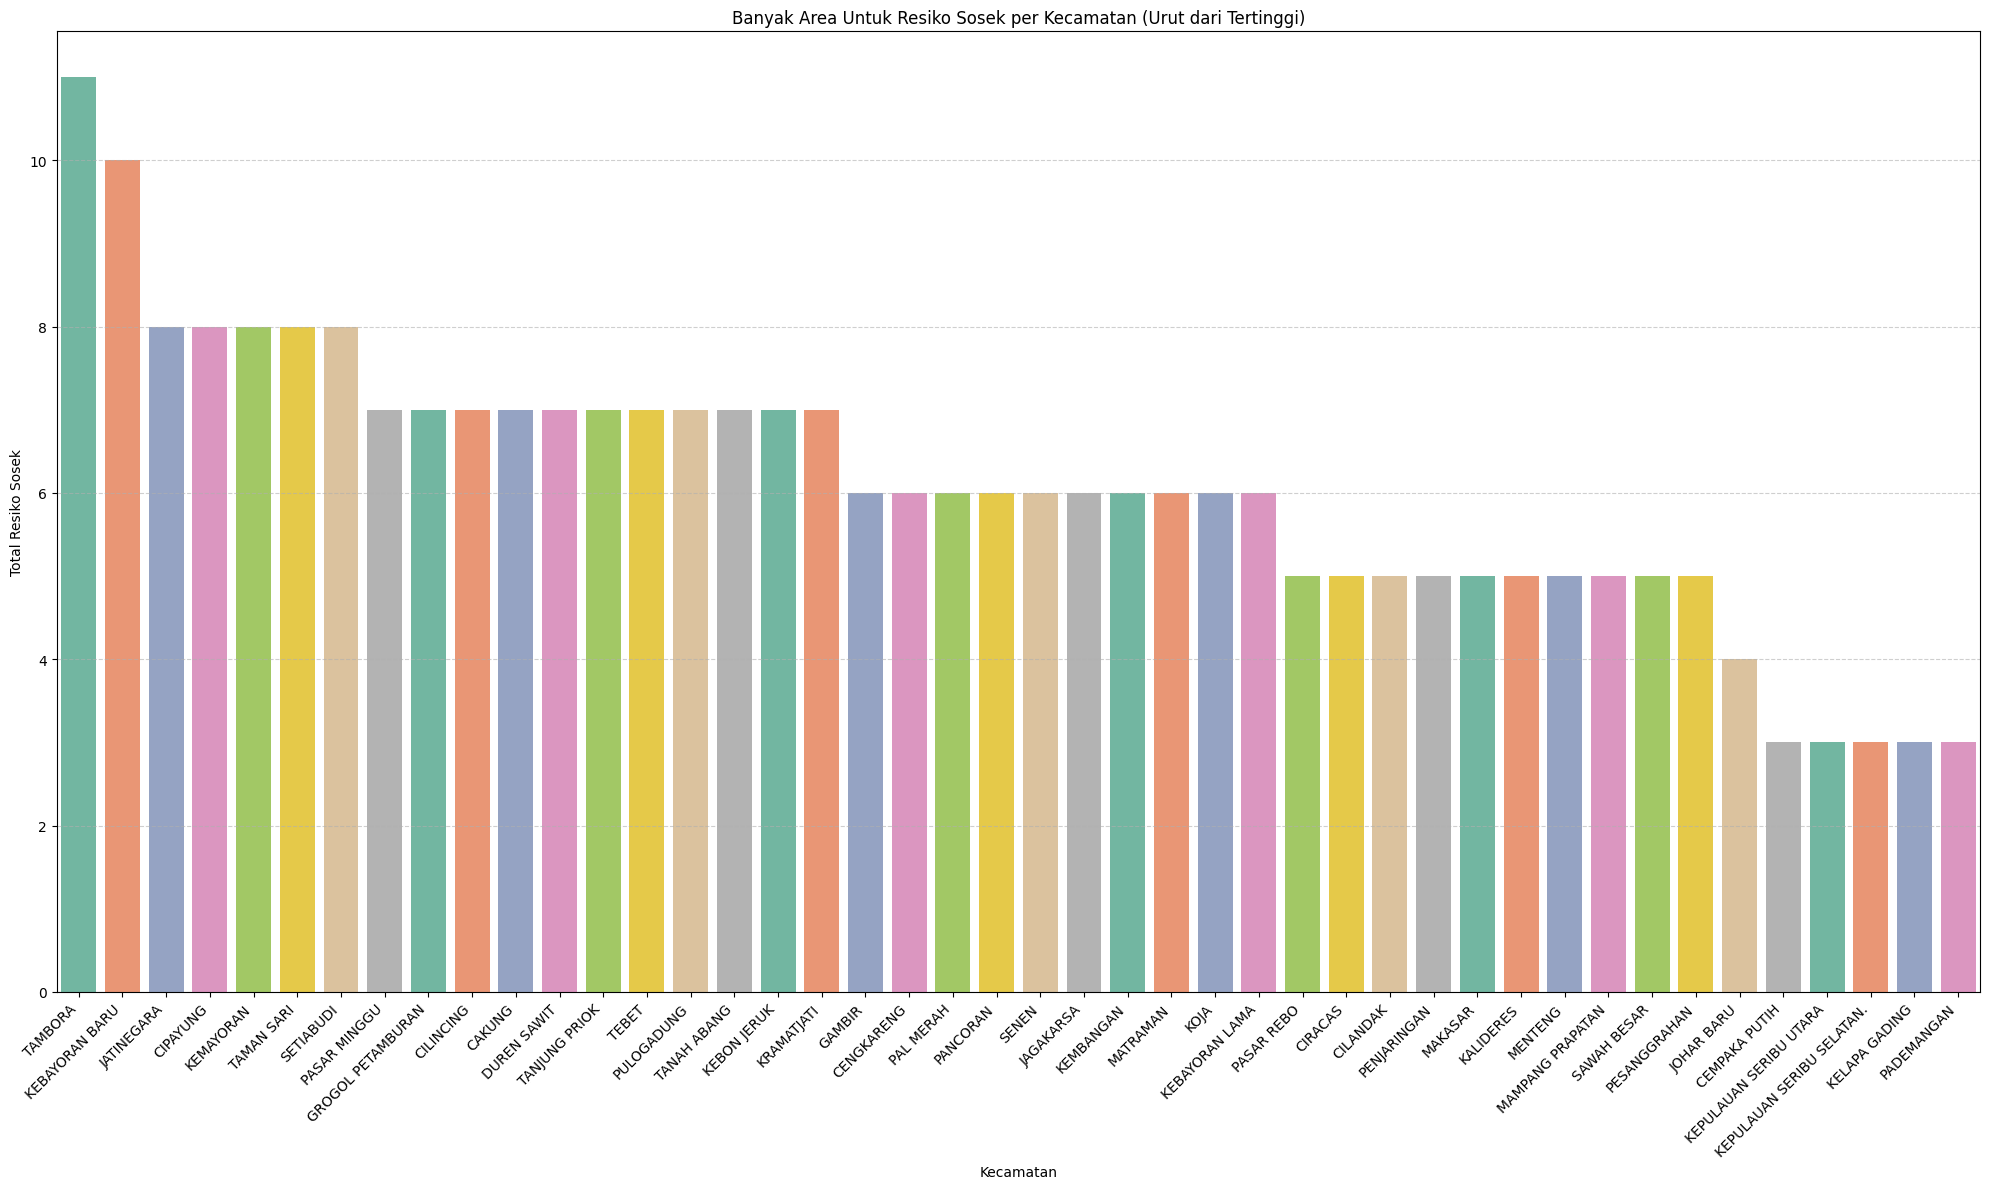

In [223]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung total resiko_sosek per kecamatan
resiko_per_kec = data.groupby('KECAMATAN')['resiko_sosek'].count().reset_index()

# Urutkan dari yang paling tinggi ke rendah
resiko_per_kec = resiko_per_kec.sort_values(by='resiko_sosek', ascending=False)

# Plot
plt.figure(figsize=(20, 12))
sns.barplot(x='KECAMATAN', y='resiko_sosek', data=resiko_per_kec, palette='Set2')
plt.xticks(rotation=45, ha='right')
plt.title('Banyak Area Untuk Resiko Sosek per Kecamatan (Urut dari Tertinggi)')
plt.xlabel('Kecamatan')
plt.ylabel('Total Resiko Sosek')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


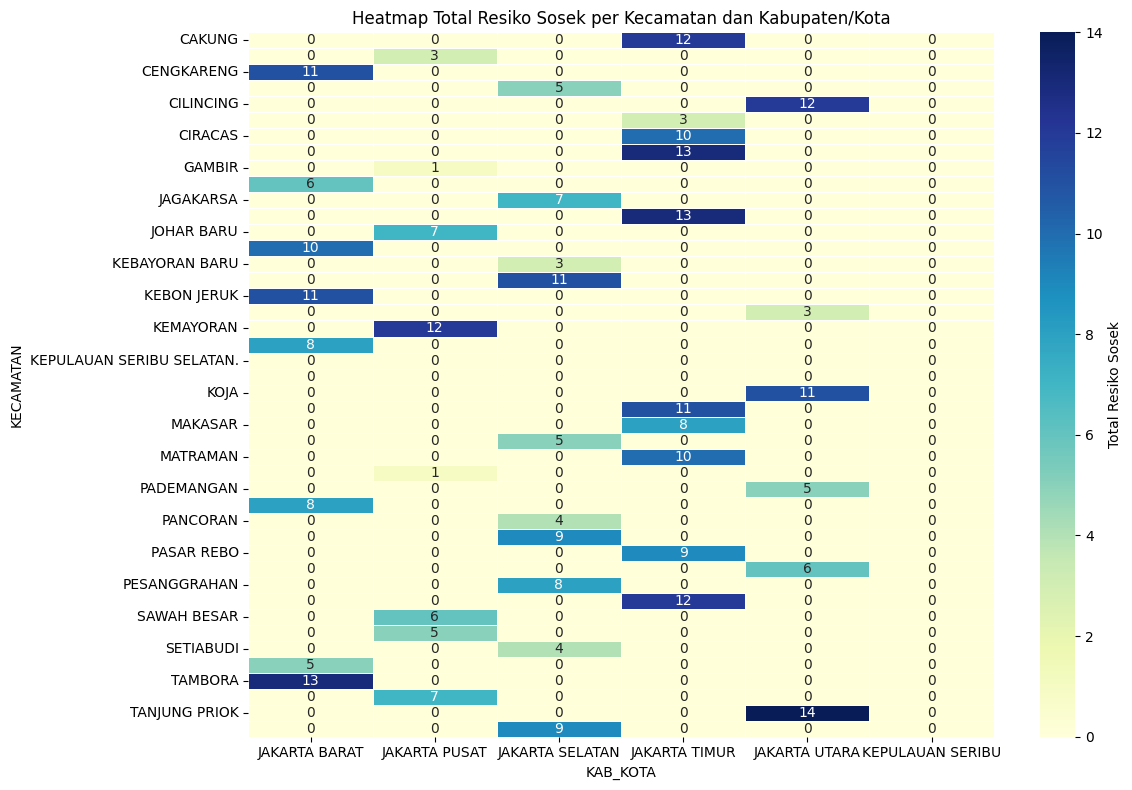

In [179]:
pivot_data = data.pivot_table(
    index='KECAMATAN',
    columns='KAB_KOTA',
    values='resiko_sosek',
    aggfunc='sum',  # atau 'count' tergantung tujuan
    fill_value=0
)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(
    pivot_data,
    annot=True,        # tampilkan angka di dalam kotak
    fmt=".0f",         # format angka (tanpa desimal)
    cmap="YlGnBu",     # colormap
    linewidths=0.5,    # garis antar sel
    cbar_kws={'label': 'Total Resiko Sosek'}
)

plt.title('Heatmap Total Resiko Sosek per Kecamatan dan Kabupaten/Kota')
plt.xlabel('KAB_KOTA')
plt.ylabel('KECAMATAN')
plt.tight_layout()
plt.show()


**2. Feature Selection dan Preprocessing untuk Decision Tree**

**Menampilkan Nilai Korelasi untuk penentuan fitur**

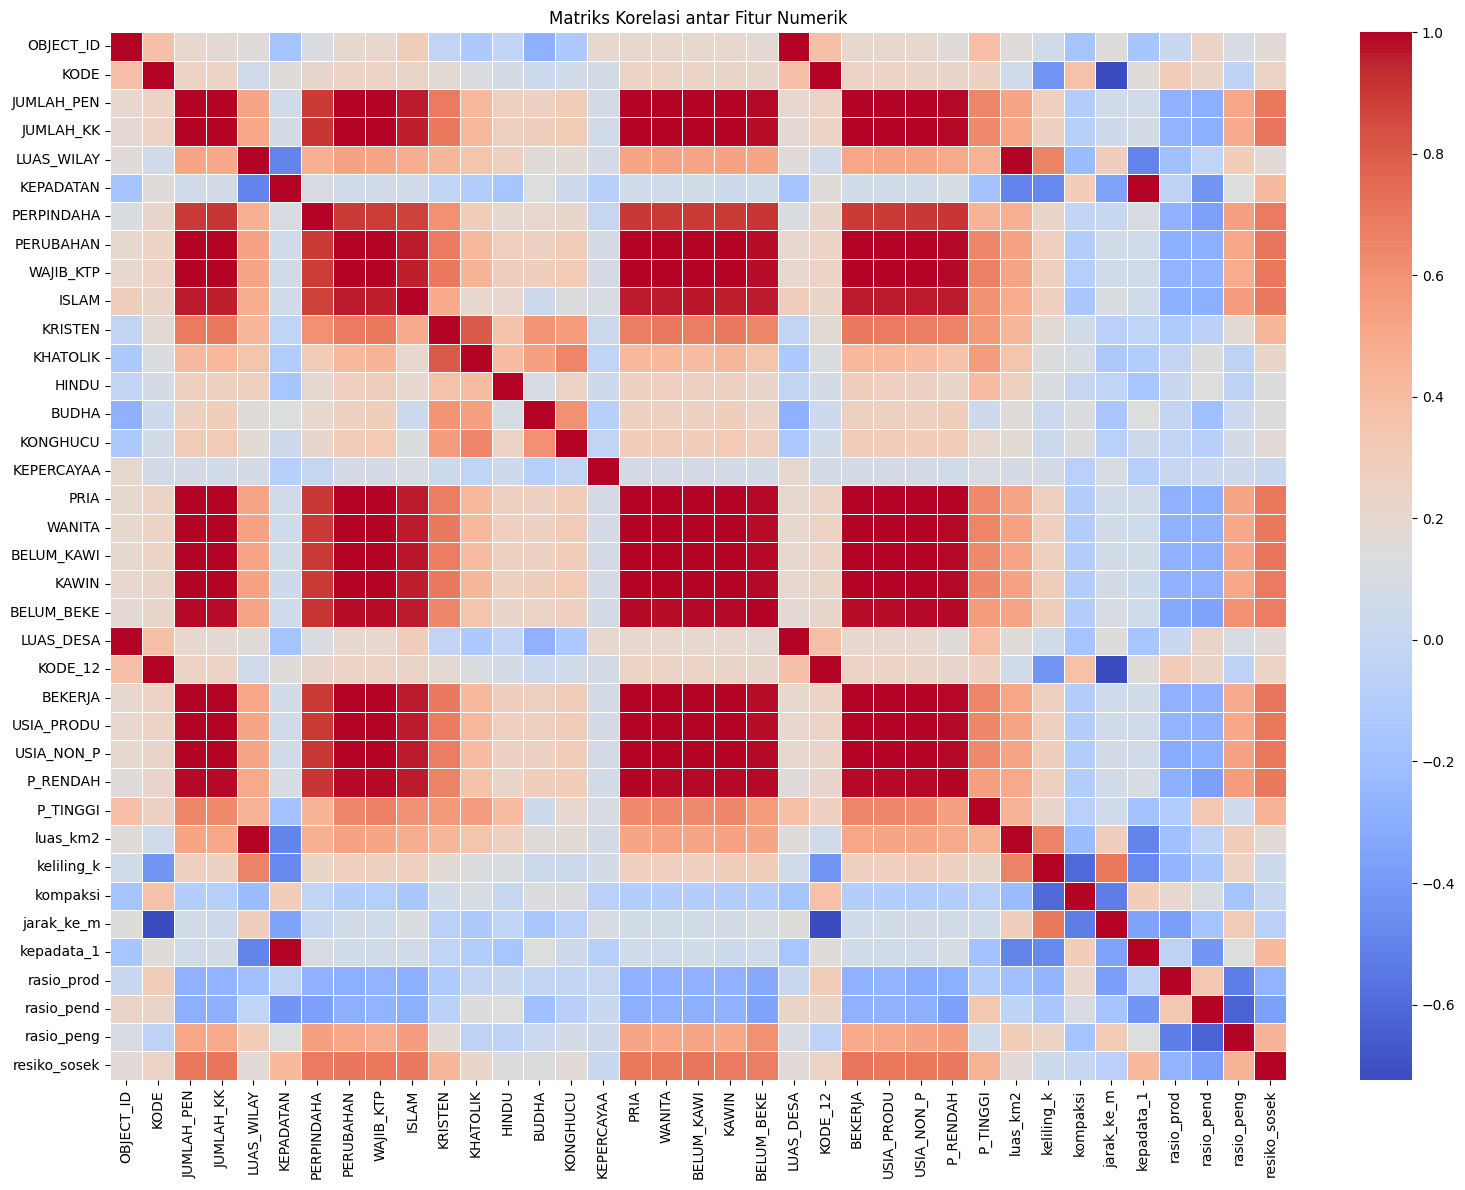

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
# Ambil hanya kolom numerik
numeric_data = data.select_dtypes(include='number')
# Hitung korelasi
correlation_matrix = numeric_data.corr()
# Plot heatmap dengan ukuran yang lebih besar
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=False,
cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriks Korelasi antar Fitur Numerik')
plt.tight_layout()
plt.show()

Hasil Plot Heatmap correlation_matrix, dapat dibuat daftar fitur yang memiliki nilai korelasi diatas 0.4 yang digunakan untuk proses selanjutnya.

Daftar fitur tersebut adalah
*   JUMLAH_PEN
*   JUMLAH_KK
*   PERPINDAHA
*   PERUBAHAN
*   WAJIB_KTP
*   BELUM_KAWI
*   KAWIN
*   BEKERJA
*   USIA_PRODU
*   USIA_NON_P
*   P_RENDAH
*   P_TINGGI
*   kepadata_1
*   rasio_peng


**Feature engineering**

In [34]:
import pandas as pd

In [181]:
# Daftar kolom yang ingin diambil
kolom_fitur = [
    'JUMLAH_PEN',
    'JUMLAH_KK',
    'PERPINDAHA',
    'PERUBAHAN',
    'WAJIB_KTP',
    'BELUM_KAWI',
    'KAWIN',
    'BEKERJA',
    'USIA_PRODU',
    'USIA_NON_P',
    'P_RENDAH',
    'P_TINGGI',
    'kepadata_1',
    'rasio_peng',
    'rasio_pend',
    'rasio_prod',
    'resiko_sosek'
]

# Ambil kolom tersebut dan simpan ke data_fitur
data_fitur = data[kolom_fitur]

In [182]:
data_fitur

,JUMLAH_PEN,JUMLAH_KK,PERPINDAHA,PERUBAHAN,WAJIB_KTP,BELUM_KAWI,KAWIN,BEKERJA,USIA_PRODU,USIA_NON_P,P_RENDAH,P_TINGGI,kepadata_1,rasio_peng,rasio_pend,rasio_prod,resiko_sosek
0,21609.0,7255.0,102.0,20464.0,16027.0,10193.0,10652.0,38012.0,15269.0,6340.0,19778.0,1831.0,61189.911080,0.181730,0.084733,0.706604,1
1,9069.0,3273.0,25.0,8724.0,7375.0,4240.0,4364.0,16409.0,6282.0,2787.0,7484.0,1585.0,24804.913958,0.153049,0.174771,0.692689,0
2,29085.0,9217.0,131.0,27497.0,20926.0,14022.0,13450.0,52553.0,20392.0,8693.0,25230.0,3855.0,55083.883622,0.183428,0.132543,0.701117,2
3,41913.0,13766.0,170.0,38323.0,30264.0,20336.0,19487.0,74879.0,29358.0,12555.0,35499.0,6414.0,43481.014371,0.193377,0.153031,0.700451,2
4,6947.0,2026.0,17.0,6853.0,4775.0,3366.0,3224.0,11808.0,4777.0,2170.0,6500.0,447.0,7571.808313,0.257377,0.064344,0.687635,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,28722.0,8889.0,68.0,26477.0,20423.0,13549.0,13858.0,49307.0,20124.0,8598.0,24658.0,4064.0,14014.763159,0.204791,0.141494,0.700648,0
263,24722.0,7529.0,91.0,22936.0,17296.0,11724.0,12225.0,41460.0,17156.0,7566.0,20808.0,3914.0,8505.080645,0.203503,0.158321,0.693957,0
264,31774.0,9996.0,87.0,29397.0,22644.0,14997.0,15725.0,53986.0,22466.0,9308.0,26579.0,5195.0,10430.346480,0.217820,0.163498,0.707056,0
265,77650.0,23362.0,162.0,73555.0,54914.0,37300.0,37773.0,132959.0,54336.0,23314.0,67488.0,10162.0,21186.229168,0.204095,0.130869,0.699755,2


**Membagi data menjadi data latih dan uji**

In [183]:
import geopandas as gpd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [184]:
## memilih fitur
feature = [
    'JUMLAH_PEN',
    'JUMLAH_KK',
    'PERPINDAHA',
    'PERUBAHAN',
    'WAJIB_KTP',
    'BELUM_KAWI',
    'KAWIN',
    'BEKERJA',
    'USIA_PRODU',
    'USIA_NON_P',
    'P_RENDAH',
    'P_TINGGI',
    'kepadata_1',
    'rasio_peng',
    'rasio_pend',
    'rasio_prod'
]
X = data_fitur[feature]

## target
y = data_fitur['resiko_sosek']

In [185]:
X

,JUMLAH_PEN,JUMLAH_KK,PERPINDAHA,PERUBAHAN,WAJIB_KTP,BELUM_KAWI,KAWIN,BEKERJA,USIA_PRODU,USIA_NON_P,P_RENDAH,P_TINGGI,kepadata_1,rasio_peng,rasio_pend,rasio_prod
0,21609.0,7255.0,102.0,20464.0,16027.0,10193.0,10652.0,38012.0,15269.0,6340.0,19778.0,1831.0,61189.911080,0.181730,0.084733,0.706604
1,9069.0,3273.0,25.0,8724.0,7375.0,4240.0,4364.0,16409.0,6282.0,2787.0,7484.0,1585.0,24804.913958,0.153049,0.174771,0.692689
2,29085.0,9217.0,131.0,27497.0,20926.0,14022.0,13450.0,52553.0,20392.0,8693.0,25230.0,3855.0,55083.883622,0.183428,0.132543,0.701117
3,41913.0,13766.0,170.0,38323.0,30264.0,20336.0,19487.0,74879.0,29358.0,12555.0,35499.0,6414.0,43481.014371,0.193377,0.153031,0.700451
4,6947.0,2026.0,17.0,6853.0,4775.0,3366.0,3224.0,11808.0,4777.0,2170.0,6500.0,447.0,7571.808313,0.257377,0.064344,0.687635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,28722.0,8889.0,68.0,26477.0,20423.0,13549.0,13858.0,49307.0,20124.0,8598.0,24658.0,4064.0,14014.763159,0.204791,0.141494,0.700648
263,24722.0,7529.0,91.0,22936.0,17296.0,11724.0,12225.0,41460.0,17156.0,7566.0,20808.0,3914.0,8505.080645,0.203503,0.158321,0.693957
264,31774.0,9996.0,87.0,29397.0,22644.0,14997.0,15725.0,53986.0,22466.0,9308.0,26579.0,5195.0,10430.346480,0.217820,0.163498,0.707056
265,77650.0,23362.0,162.0,73555.0,54914.0,37300.0,37773.0,132959.0,54336.0,23314.0,67488.0,10162.0,21186.229168,0.204095,0.130869,0.699755


In [186]:
y

,resiko_sosek
0,1
1,0
2,2
3,2
4,0
...,...
262,0
263,0
264,0
265,2


**Membagi data menjadi data latih dan uji**

In [199]:
## 0.2 menggunakan 20% data test,
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Normalisasi data**

| Metrik             | Tipe Model  | Tujuan                           | Nilai Ideal | Default di Sklearn                |
| ------------------ | ----------- | -------------------------------- | ----------- | --------------------------------- |
| Gini Index         | Klasifikasi | Meminimalkan ketidakmurnian node | 0           | ✅ Ya                              |
| Entropy            | Klasifikasi | Maksimalkan informasi (gain)     | 0           | ❌ Tidak                           |
| Variance Reduction | Regresi     | Minimalkan variasi nilai target  | 0           | ✅ Ya (di `DecisionTreeRegressor`) |


In [200]:
from sklearn.tree import DecisionTreeClassifier

# Menggunakan Gini (default)
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=42)

# Menggunakan Entropy (information gain)
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)


**3. Modeling dengan Decision Tree**

**Melatih model Decision Tree**

In [97]:
from sklearn.tree import DecisionTreeClassifier

In [201]:
## membuat fit model Gini dan Entropy
clf_entropy.fit(X_train, y_train)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [202]:
## Running Model Gini dan Entropy
clf_gini
clf_entropy

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [203]:
## mencoba model gini
y_pred = clf_gini.predict(X_test)

In [204]:
# Evaluasi Model Gini
print("Evaluasi Model Gini")
print("Akurasi:", accuracy_score(y_test, y_pred))
print("Classification Report:\n",
classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred))


Evaluasi Model Gini
Akurasi: 0.8148148148148148
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.67      0.75      0.71        16
           2       0.85      0.82      0.84        28

    accuracy                           0.81        54
   macro avg       0.84      0.82      0.83        54
weighted avg       0.82      0.81      0.82        54

Confusion Matrix:
 [[ 9  1  0]
 [ 0 12  4]
 [ 0  5 23]]


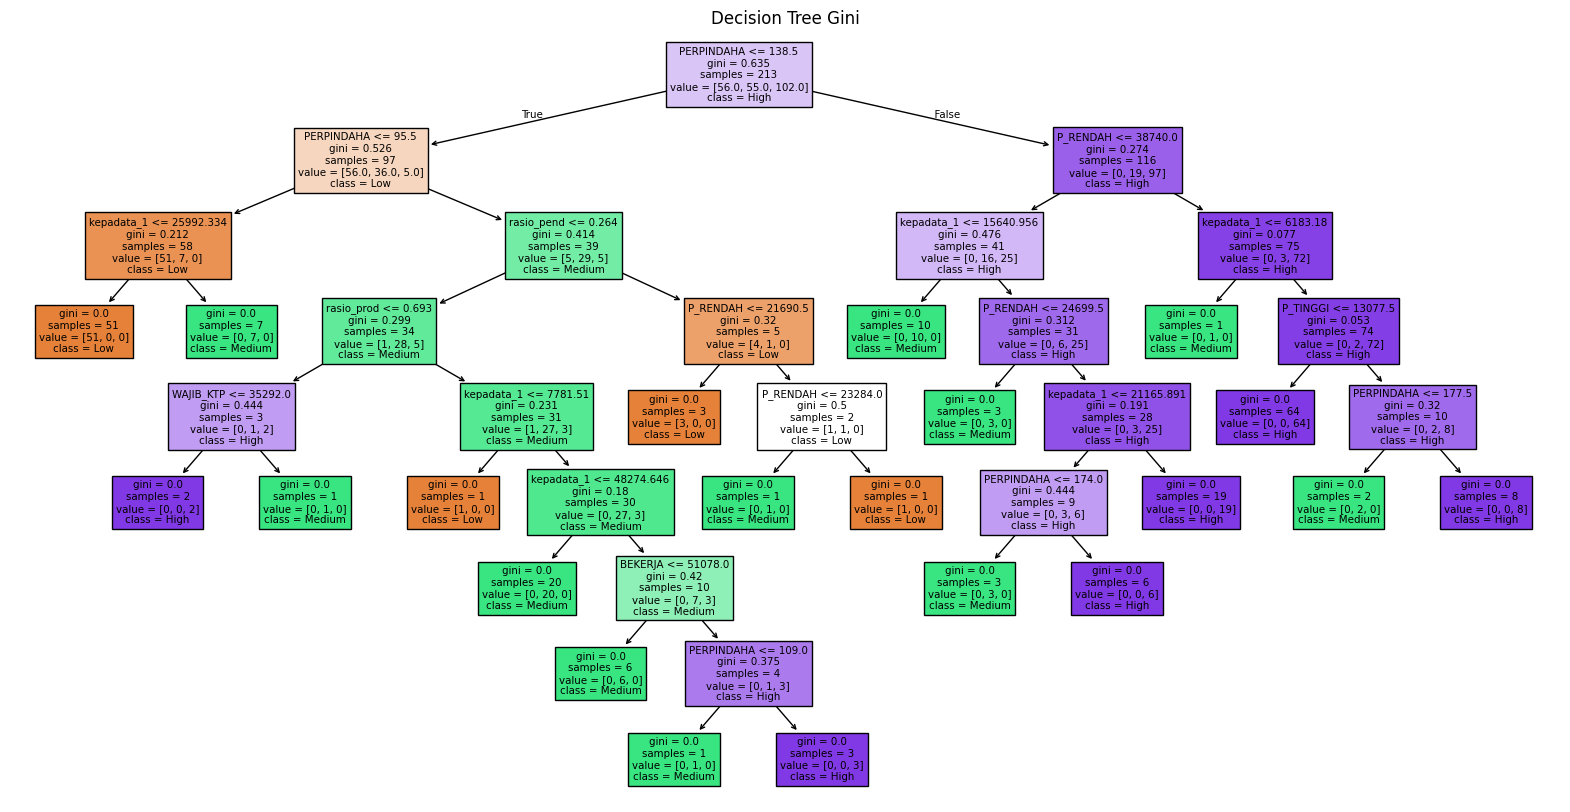

In [205]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
# Visualisasi
plt.figure(figsize=(20,10))
plot_tree(clf_gini, feature_names=X.columns,
class_names=['Low', 'Medium', 'High'], filled=True)
plt.title("Decision Tree Gini")

plt.show()

In [206]:
## Running Model Entropy
y_pred = clf_entropy.predict(X_test)

In [207]:
# Evaluasi Model Entropy
print("Evaluasi Model Entropy")
print("Akurasi:", accuracy_score(y_test, y_pred))
print("Classification Report:\n",
classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred))


Evaluasi Model Entropy
Akurasi: 0.8888888888888888
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.81      0.81      0.81        16
           2       0.93      0.93      0.93        28

    accuracy                           0.89        54
   macro avg       0.88      0.88      0.88        54
weighted avg       0.89      0.89      0.89        54

Confusion Matrix:
 [[ 9  1  0]
 [ 1 13  2]
 [ 0  2 26]]


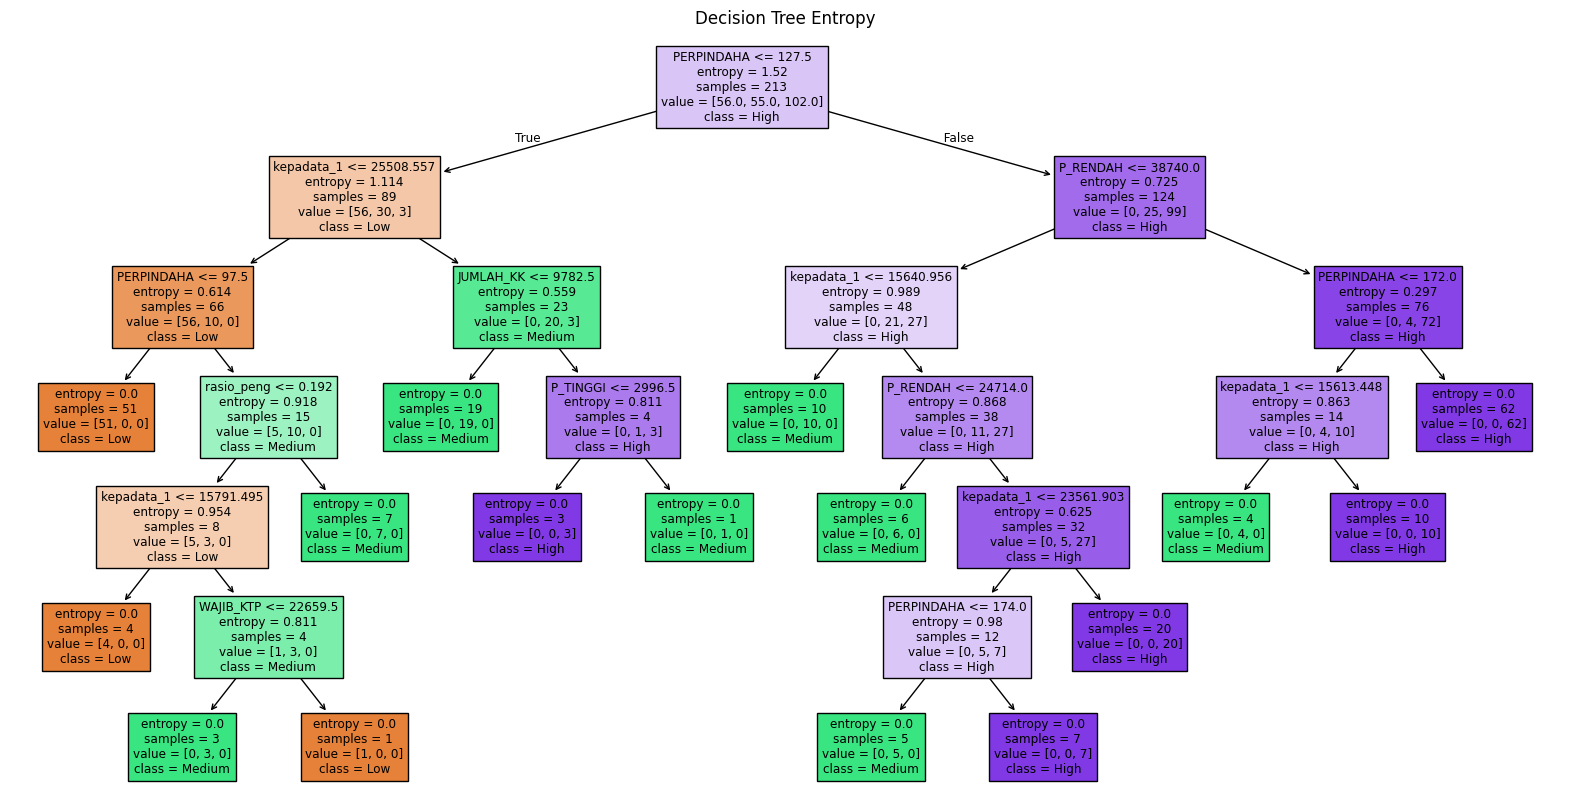

In [209]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
# Visualisasi
plt.figure(figsize=(20,10))
plot_tree(clf_entropy, feature_names=X.columns,
class_names=['Low', 'Medium', 'High'], filled=True)
plt.title("Decision Tree Entropy")

plt.show()

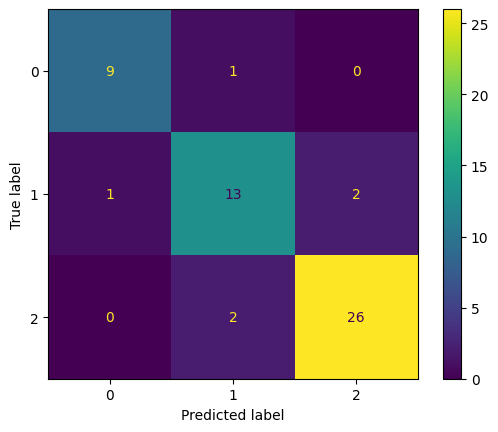

In [210]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

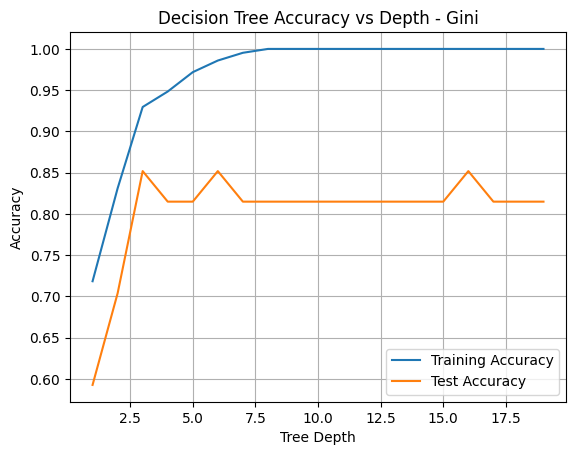

In [212]:
## Plot Akurasi terhadap Parameter (Depth) - Gini
import numpy as np

depths = range(1, 20)
train_scores = []
test_scores = []

for d in depths:
    clf_gini = DecisionTreeClassifier(max_depth=d)
    clf_gini.fit(X_train, y_train)
    train_scores.append(clf_gini.score(X_train, y_train))
    test_scores.append(clf_gini.score(X_test, y_test))

plt.plot(depths, train_scores, label='Training Accuracy')
plt.plot(depths, test_scores, label='Test Accuracy')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy vs Depth - Gini')
plt.legend()
plt.grid()
plt.show()


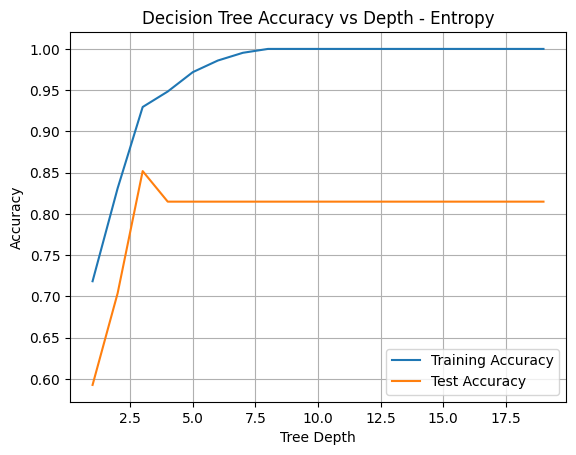

In [213]:
## Plot Akurasi terhadap Parameter (Depth) - Entropy
import numpy as np

depths = range(1, 20)
train_scores = []
test_scores = []

for d in depths:
    clf_entropy = DecisionTreeClassifier(max_depth=d)
    clf_entropy.fit(X_train, y_train)
    train_scores.append(clf_entropy.score(X_train, y_train))
    test_scores.append(clf_entropy.score(X_test, y_test))

plt.plot(depths, train_scores, label='Training Accuracy')
plt.plot(depths, test_scores, label='Test Accuracy')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy vs Depth - Entropy')
plt.legend()
plt.grid()
plt.show()


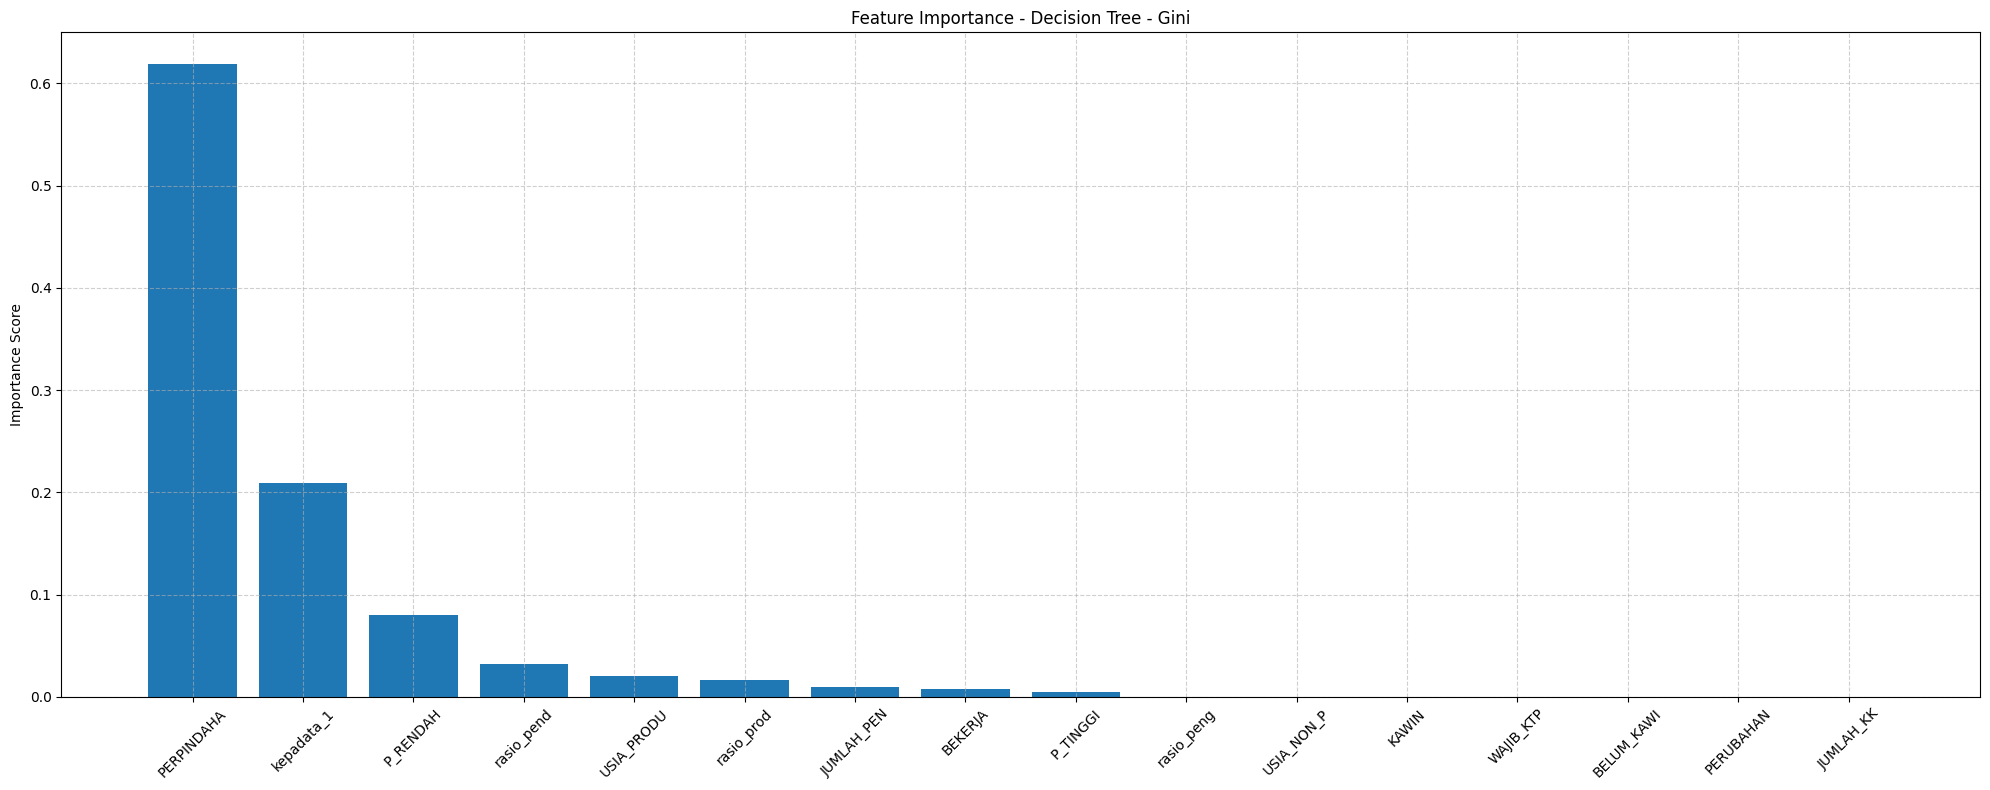

In [214]:
## Gini
import matplotlib.pyplot as plt
import numpy as np

# Ambil importance dan nama fiturnya
importances = clf_gini.feature_importances_
feature_names = X_train.columns  # pastikan X_train adalah DataFrame

# Urutkan berdasarkan nilai
indices = np.argsort(importances)[::-1]  # descending

# Plot
plt.figure(figsize=(20, 8))
plt.title("Feature Importance - Decision Tree - Gini")
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), feature_names[indices], rotation=45)
plt.ylabel("Importance Score")
plt.tight_layout()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


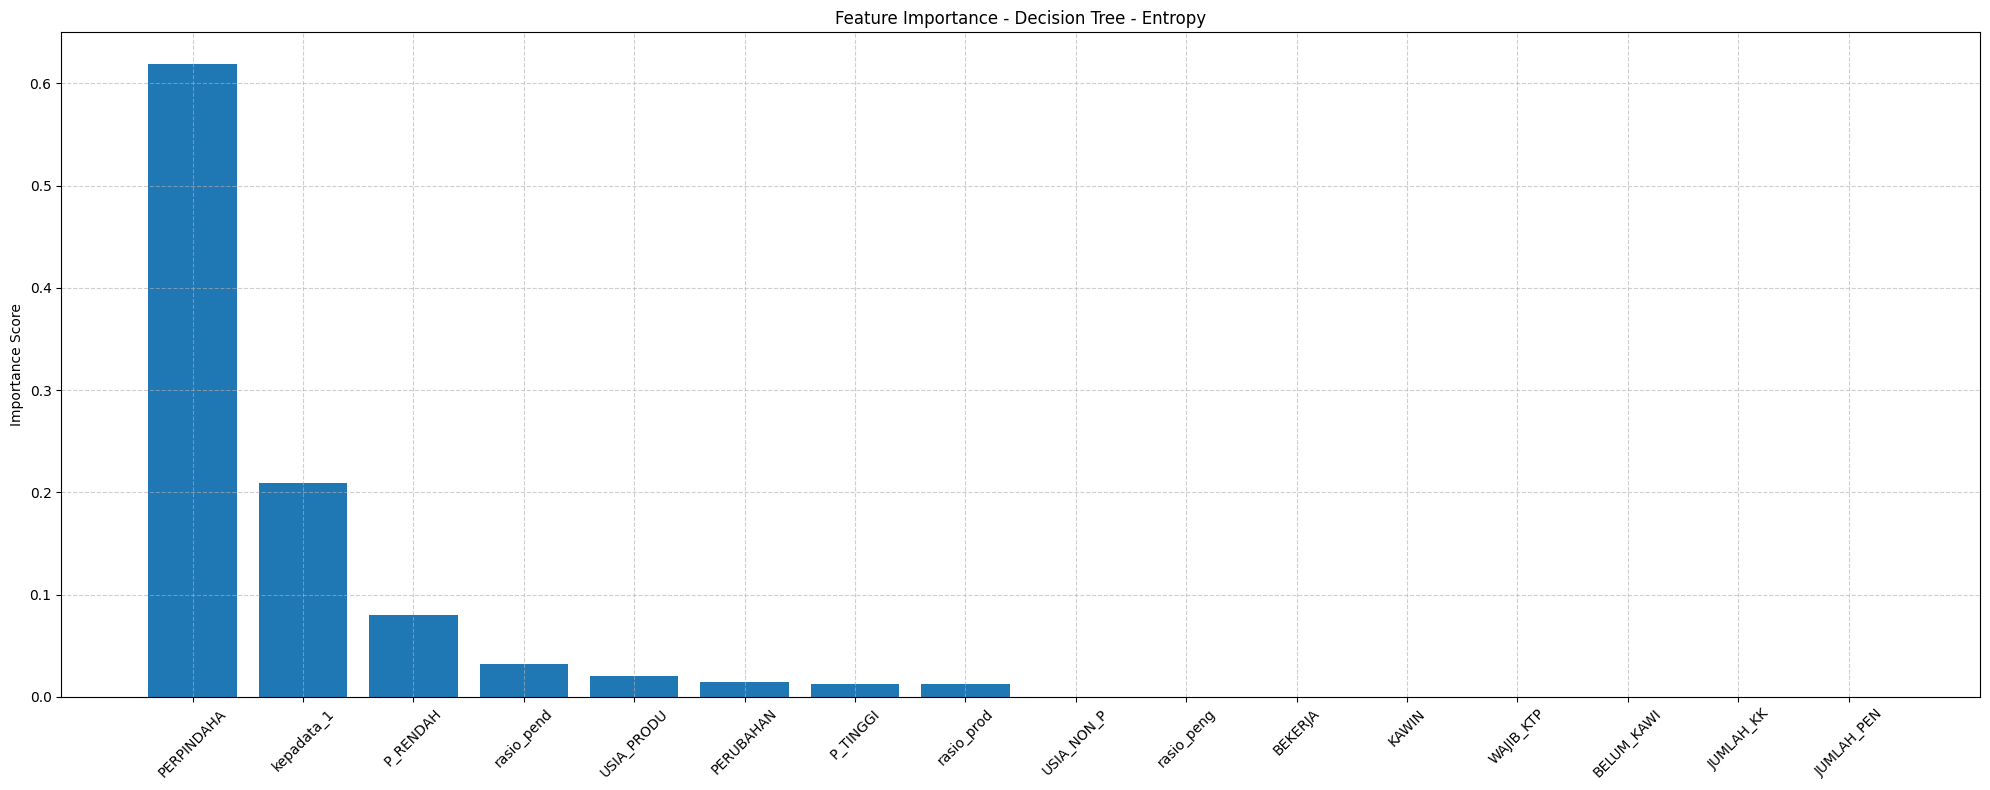

In [216]:
## Entropy
import matplotlib.pyplot as plt
import numpy as np

# Ambil importance dan nama fiturnya
importances = clf_entropy.feature_importances_
feature_names = X_train.columns  # pastikan X_train adalah DataFrame

# Urutkan berdasarkan nilai
indices = np.argsort(importances)[::-1]  # descending

# Plot
plt.figure(figsize=(20, 8))
plt.title("Feature Importance - Decision Tree - Entropy")
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), feature_names[indices], rotation=45)
plt.ylabel("Importance Score")
plt.tight_layout()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


**Kesimpulan :**

* Kecamatan dengan nilai resiko_sosek == 0:
 * TAMAN SARI
 * KEPULAUAN SERIBU UTARA
 * SAWAH BESAR
 * KEPULAUAN SERIBU SELATAN.
 * GAMBIR
 * SENEN
 * CEMPAKA PUTIH
 * MENTENG
 * PENJARINGAN
 * KELAPA GADING
 * GROGOL PETAMBURAN
 * KEBON JERUK
 * SETIABUDI
 * MAMPANG PRAPATAN
 * KEBAYORAN BARU
 * CILANDAK
 * PANCORAN
 * JAGAKARSA
 * KEMAYORAN
 * TANAH ABANG
 * TAMBORA
 * PAL MERAH
 * TEBET
 * KEMBANGAN
 * JATINEGARA
 * CIPAYUNG

* Kecamatan TAMBORA merupakan kecamatan yang memiliki jumlah area resiko_sosek paling tinggi
* Kecamatan TANJUNG PRIOK merupakan kecamatan yang memiliki Total resiko_sosek paling banyak
* KAB_KOTA KEPULAUAN SERIBU merupakan kecamatan yang memiliki Total resiko_sosek paling rendah

* Berdasarkan correlation_matrix fitur yg akan digunakan untuk pemodelan adalah
 *JUMLAH_PEN
 *JUMLAH_KK
 *PERPINDAHA
 *PERUBAHAN
 *WAJIB_KTP
 *BELUM_KAWI
 *KAWIN
 *BEKERJA
 *USIA_PRODU
 *USIA_NON_P
 *P_RENDAH
 *P_TINGGI
 *kepadata_1
 *rasio_peng

* Berdasarkan hasil pengujian terhadap dataset diperoleh :


| Metrik           | Gini Index | Entropy      |
| ---------------- | ---------- | ------------ |
| Akurasi          | 81.48%     | **88.89%** ✅ |
| Macro Avg F1     | 0.83       | **0.88** ✅   |
| Weighted Avg F1  | 0.82       | **0.89** ✅   |
| Recall (kelas 1) | 75%        | **81%** ✅    |
| Recall (kelas 2) | 82%        | **93%** ✅    |


* Model dengan criterion='entropy' menghasilkan performa lebih tinggi dibandingkan Gini, terutama dalam mengklasifikasikan kelas minoritas dan dominan secara lebih akurat.
* Dari hasil pemodelan diketahui 3 feature Importace yaitu PERPINDAHA, kepadata_1 dan P_RENDAH